### Machine Learning

#### Classification with SciKit-Learn

##### Classification Models

In [23]:
#Import useful Libraries
import numpy as np
#for loading DataFrame and some manipulation
import pandas as pd

#for visualization
import matplotlib.pyplot as plt

#to build the Classification model
from sklearn.linear_model import LogisticRegression

#for splitting data into: training and testing data
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#to check the performance of the models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#to tackle imbalanced data
from imblearn.over_sampling import SMOTE

#to split data 
from sklearn.model_selection import train_test_split

In [2]:
#Import Dataset

filepath = r"C:\Users\damil\Documents\2024 Skills\Data Science_Python\python-for-data-science-dataset\python-for-data-science-course-main\WineQT.csv"

m_Wdf = pd.read_csv(filepath)


#Dataset overview
m_Wdf.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
#Dataset overview

m_Wdf.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [4]:
#Dataset overview

m_Wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
#Dataset overview

m_Wdf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

<Axes: >

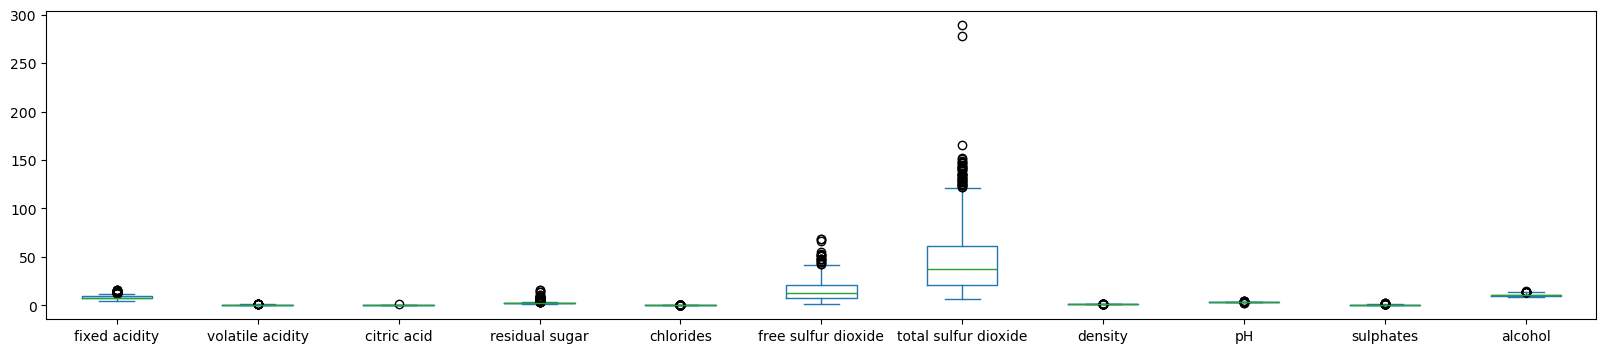

In [6]:
#to check for outliers
#using a 'box plot'
var = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
m_Wdf[var].plot(
    kind = 'box',
    figsize = (20, 4)
    
)


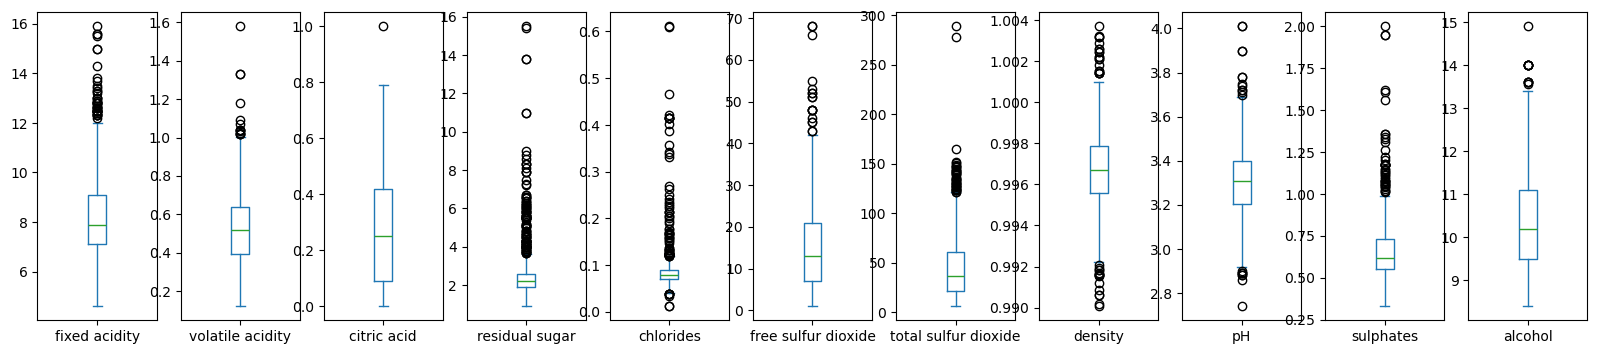

In [7]:
#to check for outliers

#using a 'box plot'
var = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
m_Wdf[var].plot(
    kind = 'box',
    figsize = (20, 4),
    subplots = True
    
);


In [8]:
#to drop the ID since it contributes no predictive part to the model

m_Wdf = m_Wdf.drop("Id", axis = 1)

m_Wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [9]:
#to check for the number of unique values in the column
m_Wdf["quality"].nunique()

6

In [10]:
#to check the unique values in the column
m_Wdf["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
#to count the number of time each item in a particular column occur i.e. frequency
m_Wdf["quality"].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

<Axes: xlabel='quality'>

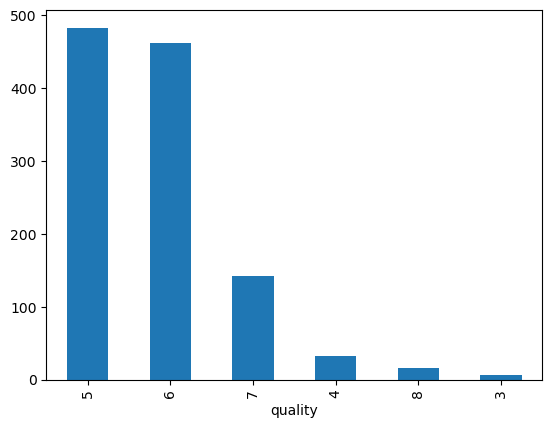

In [12]:
#to count the number of time each item in a particular column occur i.e. frequency
m_Wdf["quality"].value_counts().plot(kind = "bar")

In [15]:

#classification background
#ML Aufgabe: to tell if a wine is of a high or low quality(target) when I input the features
#I will say any wine with quality > 6 is of high quality else it of low quality


m_Wdf["wineClass"] = m_Wdf["quality"].apply(lambda x: "High" if x > 6 else "low")
m_Wdf.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wineClass
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low


In [16]:
#to drop the wineClass

m_Wdf = m_Wdf.drop("wineClass", axis = 1)

m_Wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [17]:
#to define the features(X) data

X = m_Wdf.drop("quality", axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
dtypes: float64(11)
memory usage: 98.4 KB


In [18]:
#to define the target(y) data
#1: high and 0:low quality wine
y = m_Wdf["quality"].apply(lambda x: 1 if x > 6 else 0)
y.head()

#NB: y is not quality value itself, i.e, the task is to determine if the wine is of high quality or low quality

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [ ]:
#to check if the data is imbalanced
#imbalance can be solved by:
    #oversampling
    #undersampling

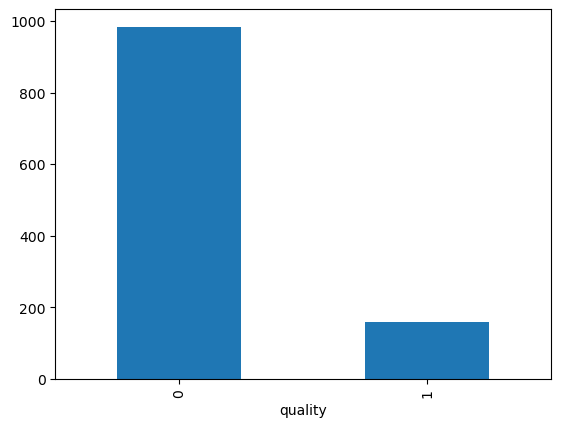

In [19]:
#to check/test for imbalance

y.value_counts().plot(
    kind = "bar",
);

#result shows there is imbalance as there are more low quality than high quality wines

In [ ]:
#to tackle imbalanced data

#!pip install --user scikit-learn
#!pip install --user imblearn
##!pip3 install --user imblearn --ignore-installed scikit-learn


In [ ]:
#to tackle imbalanced data
from imblearn.over_sampling import SMOTE

In [21]:
#SMOTE instance

smote = SMOTE(sampling_strategy = "auto", random_state =42)

#set new X and y data
X_resampled, y_resampled = smote.fit_resample(X, y)

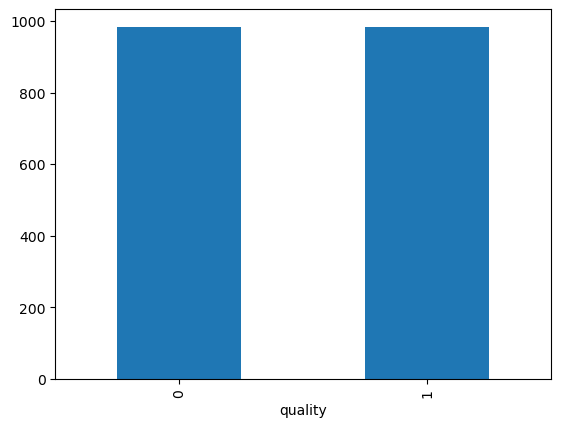

In [22]:
#to check/test for imbalance

y_resampled.value_counts().plot(
    kind = "bar",
);

#result shows there is a balanced data due to the use of synthetic data and thus equivalent data of low quality and high quality wines

In [24]:
#split the resampled data into train and test data

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

In [25]:
#to check

print(X_resampled.shape)
print()
print(X_train.shape)

(1968, 11)

(1574, 11)


In [31]:
#to train the model using the -Random Forest Classifier

W_model = RandomForestClassifier()

In [32]:
#to fit the training model

W_model.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
#to create predictions with the test data

y_pred = W_model.predict(X_test)

In [42]:
#to compare y_pred and y_test to 2 decimal places

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy score for W_model is {accuracy:.3f}. It means the model is predicting pretty accurately.")
print()

precision = precision_score(y_test, y_pred)
print(f"The precision score for W_model is {precision:.3f}")
print()

recall = recall_score(y_test, y_pred)
print(f"The recall score for W_model is {recall:.3f}")
print()

f1 = f1_score(y_test, y_pred)
print(f"The f1 score for W_model is {f1:.3f}")
print()

The accuracy score for W_model is 0.944. It means the model is predicting pretty accurately.

The precision score for W_model is 0.933

The recall score for W_model is 0.953

The f1 score for W_model is 0.943

